In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('data/telecom_churn.csv')

In [41]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [42]:
df.shape

(3333, 20)

## whole dataset visualizations

In [43]:
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})

In [44]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [45]:
df['Churn'] = df['Churn'].astype('int')

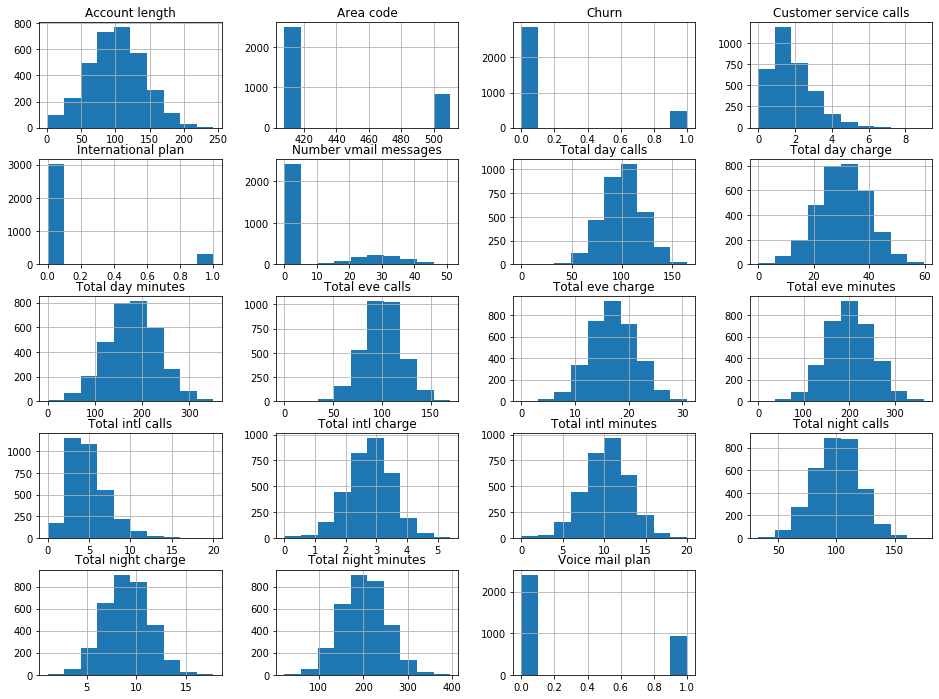

In [46]:
plt.rcParams['figure.figsize'] = (16, 12)
df.drop(['State'], axis=1).hist();

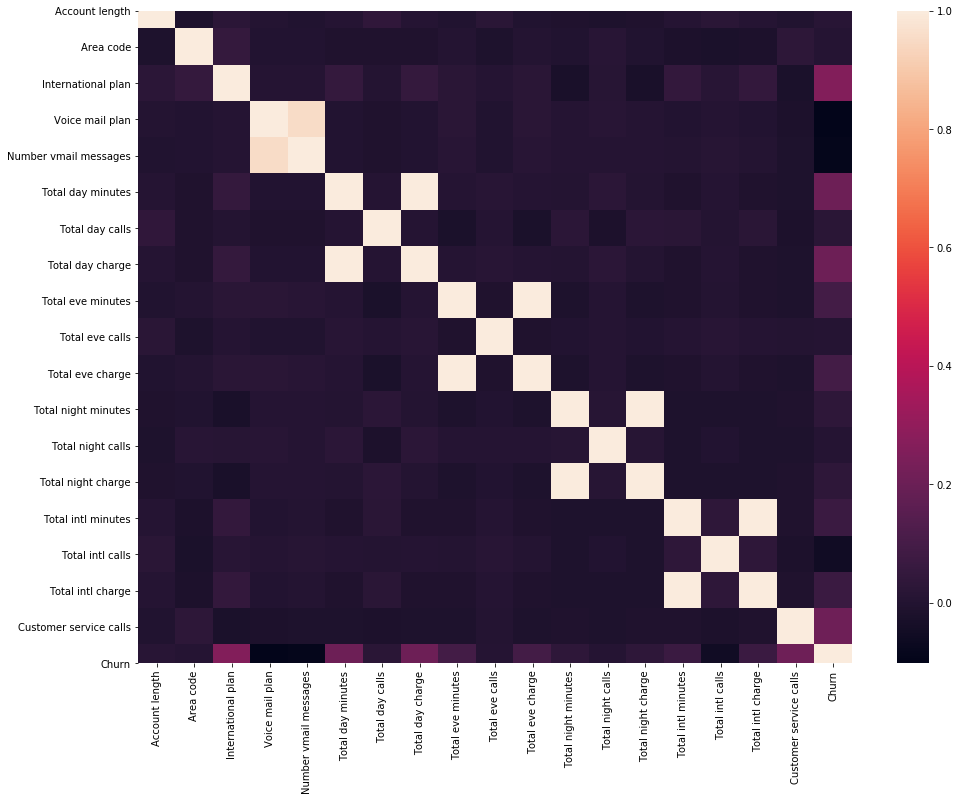

In [47]:
sns.heatmap(df.corr());

In [48]:
df.drop([feat_name for feat_name in df.columns
if 'charge' in feat_name], axis = 1, inplace = True)

In [49]:
df.shape


(3333, 16)

In [50]:
from sklearn.manifold import TSNE

In [51]:
df.shape

(3333, 16)

In [52]:
state = df['State']
df.drop('State', axis = 1, inplace = True)

In [53]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [54]:
tsne = TSNE(random_state = 17)

In [55]:
%%time
X_repr = tsne.fit_transform(df)

Wall time: 41.3 s


In [56]:
X_repr.shape

(3333, 2)

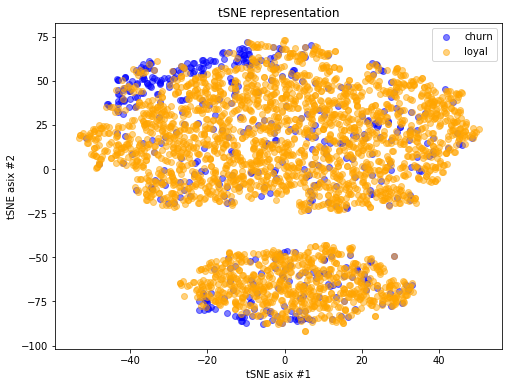

In [57]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.scatter(X_repr[df['Churn']==1, 0], 
            X_repr[df['Churn']==1, 1], alpha = 0.5, c = 'blue',
           label = 'churn');
plt.scatter(X_repr[df['Churn']==0, 0], 
            X_repr[df['Churn']==0, 1], alpha = 0.5, c = 'orange',
           label = 'loyal');
plt.xlabel('tSNE asix #1')
plt.ylabel('tSNE asix #2')
plt.legend()
plt.title('tSNE representation');
plt.savefig('churn_tsne.png', dpi = 300);

<img src = 'churn_tsne.png'>

## Features one at a time
### Numeric

In [58]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

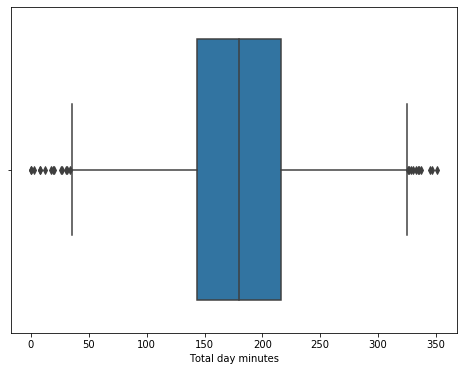

In [59]:
sns.boxplot(x = 'Total day minutes', data = df);

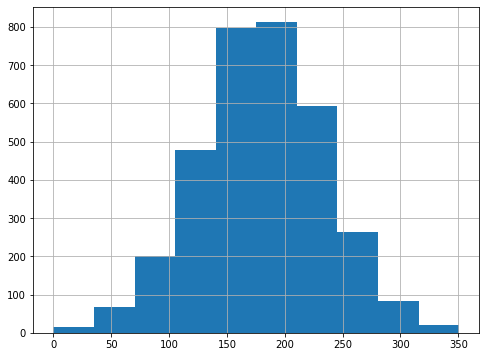

In [60]:
plt.rcParams['figure.figsize'] = (8,6)
df['Total day minutes'].hist();

### Categorical

In [62]:
df['Churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

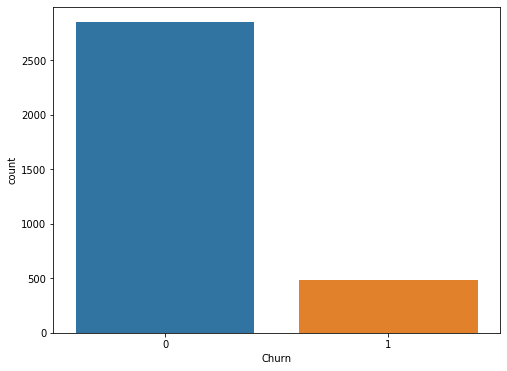

In [63]:
sns.countplot(x = 'Churn', data = df);

In [66]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [67]:
df.corrwith(df['Total day minutes']) 

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

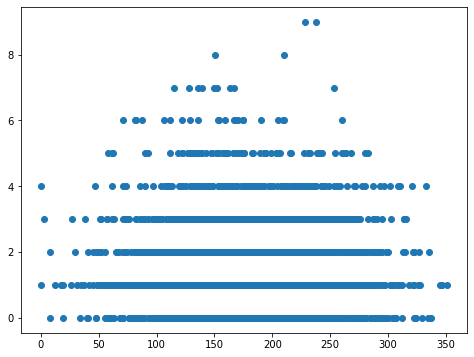

In [68]:
plt.scatter(df['Total day minutes'], df['Customer service calls']);

### Categorical - categorical

In [69]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


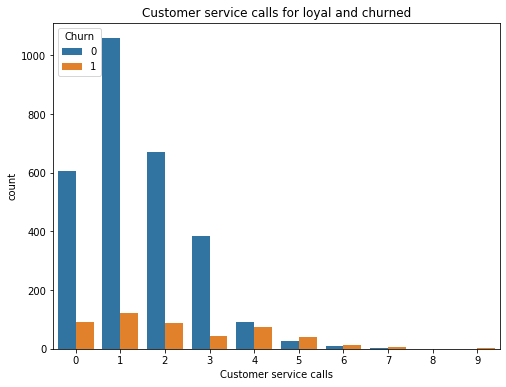

In [70]:
sns.countplot(x= 'Customer service calls', hue = 'Churn', data = df);
plt.title('Customer service calls for loyal and churned');

In [73]:
import numpy as np

### Categorical - numeric

In [76]:
df.groupby('Churn')['Total day minutes', 'Customer service calls' ].agg([np.median, np.std])

Total day minutes            Customer service calls          
                 median        std                 median       std
Churn                                                              
0                 177.2  50.181655                      1  1.163883
1                 217.6  68.997792                      2  1.853275

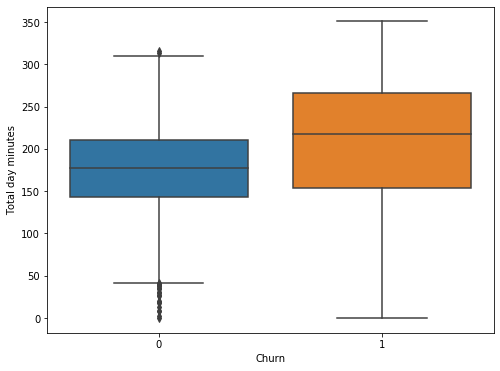

In [79]:
sns.boxplot(x = 'Churn', y = 'Total day minutes', data =df);